# Sourcing and loading the data

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#Load the data using pandas library
df = pd.read_csv('datasets_918_1674_wineQualityReds.csv')

In [3]:
# See first 5 rows of the data set
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Overview of the lodaded dataset using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
'''So far, for this dataset we should take off the Unnamed column since it does not apport anything
Some variables that may work for the linear model would be the quality since it is composed by integers
All of the columns do not have null values as well.
Residual sugar and free sulfur dioxide may also work for the regression by skimming the data'''

'So far, for this dataset we should take off the Unnamed column since it does not apport anything\nSome variables that may work for the linear model would be the quality since it is composed by integers\nAll of the columns do not have null values as well.\nResidual sugar and free sulfur dioxide may also work for the regression by skimming the data'

In [6]:
#Drop of the Unnamed column by using the drop function
df.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
# We should also look more closely at the dimensions of the dataset. 
df.shape

(1599, 12)

#### Choose the dependant variable

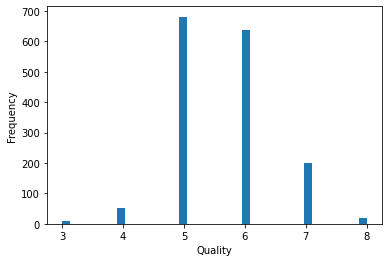

In [8]:
#Make an histogram of the quality column since it looks good option to be the dependant variable
#Try to avoid the bins bias as much as possible
n_bins = np.sqrt(len(df['quality']))
n_bins = int(n_bins)
plt.hist(df['quality'], bins = n_bins)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [9]:
'''Some problems were founded. The biggest problem is that since quality is composed just by integers, this 
is not a continous variable and it supposes a problem at the time of making the regression'''

'Some problems were founded. The biggest problem is that since quality is composed just by integers, this \nis not a continous variable and it supposes a problem at the time of making the regression'

In [10]:
# Get a basic statistical summary of the variable 
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [11]:
# What do you notice from this summary? 
'''The mean is not an integer, but the 50% percentile is 6.00. I can conclude it is not a continous variable becuase
actually the mean differs from the 50% percentile'''

'The mean is not an integer, but the 50% percentile is 6.00. I can conclude it is not a continous variable becuase\nactually the mean differs from the 50% percentile'

In [12]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
# By using the value counts, we double checked this variable is only composed by integers
#Acidity may be a good option to be the dependant variable

In [14]:
# We can see the correlation between the variables by using the corr() method
corr_matrix = df.corr()
corr_matrix

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Cleaning, transforming and visualizing

In [15]:
# Make a pairplot of the wine data
# sns.pairplot(df)

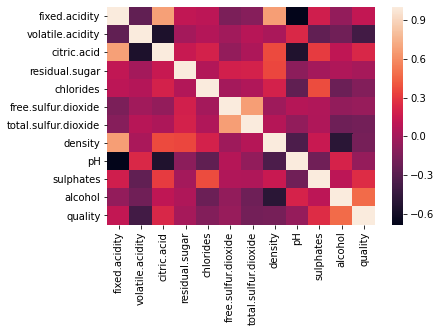

In [16]:
#Make a heatmap to see the variables that are more correlated to make the regression
sns.heatmap(corr_matrix)

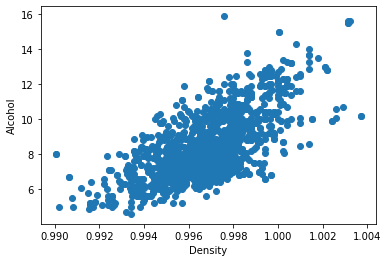

In [17]:
# We see a relatively strong correlation between the density and fixed acidity variables.
# Scatter plot between density and alcohol
plt.scatter(x = 'density', y = 'fixed.acidity', data = df)
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()

In [18]:
'''We are seeing a positive correlation and few outliers. They look good to make the regression'''

'We are seeing a positive correlation and few outliers. They look good to make the regression'

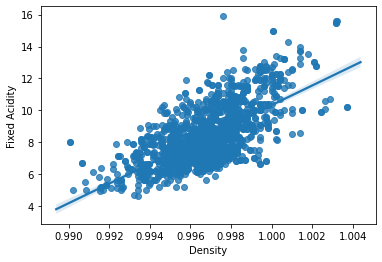

In [19]:
# Call the regplot method on your sns object, with parameters: x = 'density', y = 'fixed.acidity'
sns.regplot(x = 'density', y = 'fixed.acidity', data = df)
plt.xlabel('Density')
plt.ylabel('Fixed Acidity')
plt.show()

# Modeling

## Model 1

### Linear regression model

In [20]:
# Subsetting our data into our dependent and independent variables.
# Create a variable called 'X' and assign it the density field of wine.
# Create a variable called 'y' (that's right, lower case) and assign it the fixed.acidity field of wine. 
# Using double brackets allows us to use the column headings. 
X = df[['density']] 
y = df[['fixed.acidity']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
# The random_state parameter allows our work to be checked and replicated by other data scientists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [21]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1199, 1) (1199, 1)
(400, 1) (400, 1)


In [22]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = LinearRegression(normalize = True)
rModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
# Evaluate the model by printing the result of calling .score() on rModel, with parameters X_train, y_train. 
print('The coefficient is:', rModel.score(X_train, y_train))

The coefficient is: 0.45487824100681695


In [24]:
# Use the model to make predictions about our test data
# Make a variable called y_pred, and assign it the result of calling the predict() method on rModel. Plug X_test into that method.
y_pred = rModel.predict(X_test)

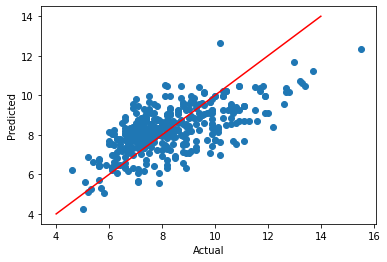

In [25]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test,y_pred)
plt.plot([x for x in range(4,15)], [y for y in range(4,15)], color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Model 2

### Ordinary Least Squares (OLS)

In [26]:
# Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)
# We make the explanatory variable X as before.
X = df[['density']] 

# But here, reassign X the value of adding a constant to it. This is required for Ordinary Least Squares Regression.

X = sm.add_constant(X)

In [27]:
# Assign the y variable.
y = df[['fixed.acidity']]

# Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [28]:
# Create the model
rModel2 = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel_results = rModel2.fit()

In [29]:
# Evaluate the model with .summary()
rModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     998.8
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          6.68e-160
Time:                        22:12:05   Log-Likelihood:                -2011.0
No. Observations:                1199   AIC:                             4026.
Df Residuals:                    1197   BIC:                             4036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -615.7316     19.746    -31.182      0.000    -654.473    -576.990
density      626.0927     19.810     31.604      0.000     587.226     664.959
==============================================================================
Omnibus:                       94.056   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.229
Skew:                           0.668   Prob(JB):                     2.87e-27
Kurtosis:                       3.812   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Let's use our new model to make predictions of the dependent variable y. 
# Use predict(), and plug in X_test as the parameter
y_pred = rModel_results.predict(X_test)

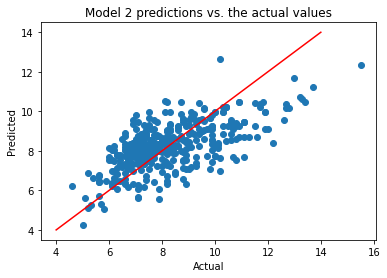

In [31]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Use plot()
# The line is making a graphic y = x. This is a line with slope 1 to see how close the points are close to this line
plt.plot([x for x in range(4,15)],[x for x in range(4,15)], color='red')

# Label it nicely
plt.title('Model 2 predictions vs. the actual values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Model 3

### Multiple Linear Regression

In [32]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
X = df.drop(['fixed.acidity', 'quality'],axis=1)
y = df[['fixed.acidity']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [33]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel3 = sm.OLS(y_train, X_train)
# Fit the model
rModel3_results = rModel3.fit()

In [34]:
# Evaluate the model
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     804.4
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:12:05   Log-Likelihood:                -1145.6
No. Observations:                1199   AIC:                             2313.
Df Residuals:                    1188   BIC:                             2369.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -648.2418     15.246    -42.518      0.000    -678.154    -618.329
volatile.acidity         0.1313      0.135      0.971      0.332      -0.134       0.397
citric.acid              1.8651      0.155     11.995      0.000       1.560       2.170
residual.sugar          -0.2485      0.015    -16.589      0.000      -0.278      -0.219
chlorides               -3.6575      0.443     -8.263      0.000      -4.526      -2.789
free.sulfur.dioxide      0.0068      0.002      2.859      0.004       0.002       0.012
total.sulfur.dioxide    -0.0064      0.001     -7.966      0.000      -0.008      -0.005
density                671.0968     15.184     44.198      0.000     641.306     700.887
pH                      -5.1954      0.149    -34.792      0.000      -5.488      -4.902
sulphates               -0.8038      0.130     -6.193      0.000      -1.058      -0.549
alcohol                  0.5713      0.025     22.753      0.000       0.522       0.621
==============================================================================
Omnibus:                      155.238   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.315
Skew:                           0.595   Prob(JB):                    7.85e-123
Kurtosis:                       6.137   Cond. No.                     7.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Use our new model to make predictions
y_pred = rModel3_results.predict(X_test)

Text(0, 0.5, 'Predicted')

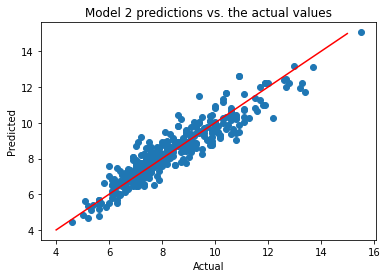

In [36]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(4,16)], [y for y in range(4,16)], color = 'red')

# Label it nicely
plt.title('Model 2 predictions vs. the actual values')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [37]:
# Define a function to check the Root Mean Squared Error.
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [38]:
# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(y_test)
matches.rename(columns = {'fixed.acidity':'actual'}, inplace=True)
matches['predicted'] = y_pred
rmse(matches['predicted'], matches['actual'])

0.6163194678948996

In [39]:
'''The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were 
making perfect predictions. 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away 
from the correct answer. '''

'The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were \nmaking perfect predictions. 0.6 signifies that we are, on average, about 0.6 of a unit of fixed acidity away \nfrom the correct answer. '

## Model 4

### Avoiding Redundancy

In [40]:
# Create test and train datasets
# Include the remaining six columns as predictors
X = df[['residual.sugar','chlorides','total.sulfur.dioxide','density','pH','sulphates']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

y = df[['fixed.acidity']]

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [41]:
# Create the fifth model
rModel4 = sm.OLS(y_train, X_train)
# Fit the model
rModel4_results = rModel4.fit()
# Evaluate the model
rModel4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fixed.acidity   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     571.8
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:12:05   Log-Likelihood:                -1562.3
No. Observations:                1199   AIC:                             3139.
Df Residuals:                    1192   BIC:                             3174.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -485.6576     16.010    -30.335      0.000    -517.068    -454.247
residual.sugar          -0.1078      0.020     -5.481      0.000      -0.146      -0.069
chlorides               -6.3544      0.578    -10.990      0.000      -7.489      -5.220
total.sulfur.dioxide    -0.0094      0.001    -11.799      0.000      -0.011      -0.008
density                516.4441     15.894     32.492      0.000     485.260     547.628
pH                      -6.0430      0.184    -32.766      0.000      -6.405      -5.681
sulphates                0.7540      0.165      4.559      0.000       0.430       1.078
==============================================================================
Omnibus:                      105.987   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.837
Skew:                           0.572   Prob(JB):                     1.22e-45
Kurtosis:                       4.683   Cond. No.                     5.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
'''The R-Squared was lower, so this show us the importance of not being redundat'''

'The R-Squared was lower, so this show us the importance of not being redundat'